# Normal Distribution

$
f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\bigg(-\frac{(x-\mu)^2}{2\sigma^2}\bigg)}
$

$
f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\bigg(-\frac{(x-\mu)^2}{2\sigma^2}\bigg)}
$

## Maximum Lilihood Estimation

$
ln(\mathcal{L}(\mu, \sigma^2)) = 
\sum_{i = 1}^n ln(f(x_i \ | \ \mu, \sigma^2))
$  

$
= ln\bigg(\frac{1}{\sqrt{2 \pi \sigma^2}}\bigg) + ln\bigg(exp\bigg(- \frac{1}{2\sigma^2} \sum_{i = 1}^n (x_i-\mu)^2\bigg)\bigg)
$  

$
= -\frac{n}{2} ln\big(2 \pi\big)  -\frac{n}{2} ln\big(\sigma^2\big) - \frac{1}{2\sigma^2} \sum_{i = 1}^n (x_i - \mu)^2
$  

In [1]:
import numpy as np


np.random.seed(42)
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def generate_dataset(num_samples: int = 10) -> np.ndarray:
    std = 3
    mean = 1.5
    return np.random.normal(loc=mean, scale=std, size=num_samples)

In [3]:
x = generate_dataset()

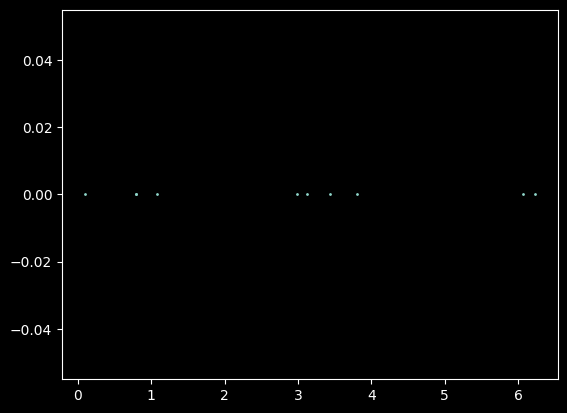

In [4]:
plt.scatter(x, [0 for _ in range(len(x))], s=1)
plt.show()

## MLE Computation

$
\hat{\mu} = \frac{1}{n} \sum_{i = 1}^n x_i
$  
  
$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i = 1}^n (x_i - \hat{\mu})^2
$

In [5]:
def estimate_mean(x: np.ndarray) -> float:
    return np.mean(x)


def estimate_std(x: np.ndarray) -> float:
    return np.std(x)

In [6]:
mu = estimate_mean(x)
sigma = estimate_std(x)

In [7]:
print(f"Mean: {mu}")
print(f"Std: {sigma}")

Mean: 2.844183335096269
Std: 2.0577177908834847


In [8]:
x_range = np.arange(start=-10.0, stop=10.0, step=0.01)
real_pdf = [norm.pdf(x, 1.5, 3) for x in x_range]
estimated_pdf = [norm.pdf(x, mu, sigma) for x in x_range]

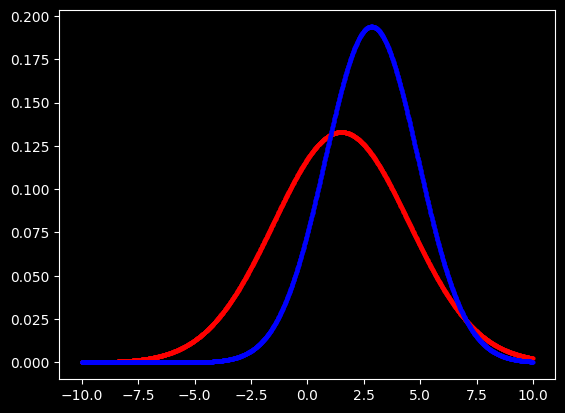

In [9]:
plt.scatter(x_range, real_pdf, color="red", s=4)
plt.scatter(x_range, estimated_pdf, color="blue", s=4)
plt.show()

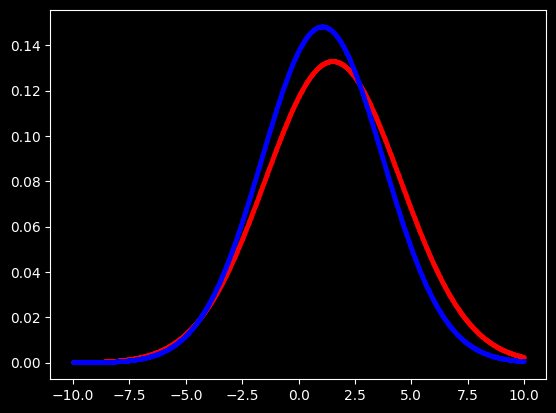

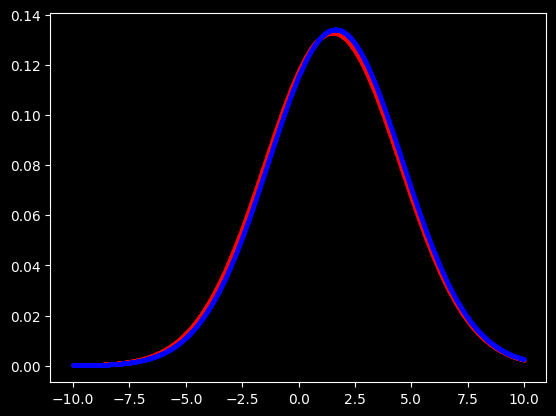

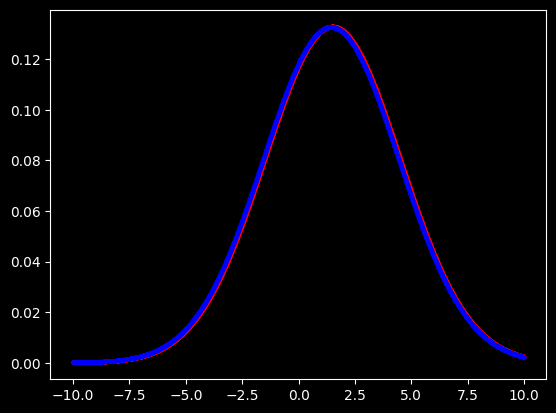

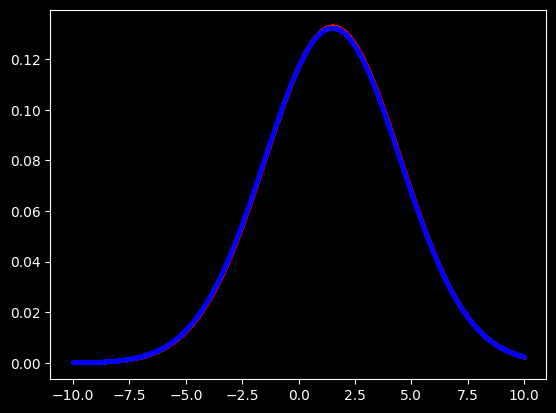

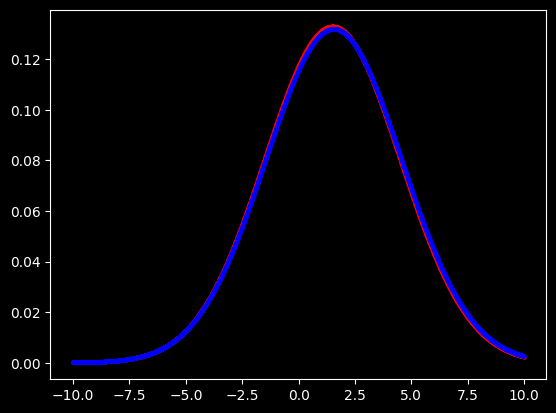

In [10]:
for num_samples in range(100, 10_000, 2000):
    x = generate_dataset(num_samples=num_samples)
    mu = estimate_mean(x)
    sigma = estimate_std(x)
    x_range = np.arange(start=-10.0, stop=10.0, step=0.01)
    real_pdf = [norm.pdf(x, 1.5, 3) for x in x_range]
    estimated_pdf = [norm.pdf(x, mu, sigma) for x in x_range]
    plt.scatter(x_range, real_pdf, color="red", s=4)
    plt.scatter(x_range, estimated_pdf, color="blue", s=4)
    plt.show()